<a href="https://colab.research.google.com/github/bbece/warmonger/blob/master/classification_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd

from sklearn import preprocessing
from matplotlib import pyplot as plt

from sklearn.metrics import (confusion_matrix, accuracy_score, f1_score, classification_report, precision_score, precision_recall_curve,average_precision_score)
import numpy as np
from sklearn.metrics import PrecisionRecallDisplay
import statistics
import plotly.express as display



In [ ]:

data = pd.read_csv("/data.csv")

In [ ]:
data.head(3)

,image_name,category_name,proba,predicts
0,images/0.NotRisky/1669033627-780682_3.jpg,0.NotRisky,"[0.9423238, 0.041981954, 0.015694257]",0.NotRisky
1,images/0.NotRisky/1669032985-395757_2.jpg,0.NotRisky,"[0.99970055, 8.718927e-05, 0.0002122652]",0.NotRisky
2,images/2.SecondHand/1669037716-3587651_3.jpg,2.SecondHand,"[0.004769557, 0.5062513, 0.48897916]",1.Risky


In [ ]:
not_risky_probas, risky_probas, second_probas = list(), list(), list()
for proba in data['proba'].values:
    proba = eval(proba)

    not_risky_probas.append(proba[0])
    risky_probas.append(proba[1])
    second_probas.append(proba[2])

In [ ]:
data['0.NotRisky_proba'] = not_risky_probas
data['1.Risky_proba'] = risky_probas
data['2.SecondHand_proba'] = second_probas

In [ ]:
data.head(2)

,image_name,category_name,proba,predicts,0.NotRisky_proba,1.Risky_proba,2.SecondHand_proba
0,images/0.NotRisky/1669033627-780682_3.jpg,0.NotRisky,"[0.9423238, 0.041981954, 0.015694257]",0.NotRisky,0.942324,0.041982,0.015694
1,images/0.NotRisky/1669032985-395757_2.jpg,0.NotRisky,"[0.99970055, 8.718927e-05, 0.0002122652]",0.NotRisky,0.999701,0.000087,0.000212


In [ ]:
categories_encoder = pd.get_dummies(data['category_name'])

data = pd.concat([data, categories_encoder], axis = 1)

In [ ]:
data.head(3)

,image_name,category_name,proba,predicts,0.NotRisky_proba,1.Risky_proba,2.SecondHand_proba,0.NotRisky,1.Risky,2.SecondHand
0,images/0.NotRisky/1669033627-780682_3.jpg,0.NotRisky,"[0.9423238, 0.041981954, 0.015694257]",0.NotRisky,0.942324,0.041982,0.015694,1,0,0
1,images/0.NotRisky/1669032985-395757_2.jpg,0.NotRisky,"[0.99970055, 8.718927e-05, 0.0002122652]",0.NotRisky,0.999701,0.000087,0.000212,1,0,0
2,images/2.SecondHand/1669037716-3587651_3.jpg,2.SecondHand,"[0.004769557, 0.5062513, 0.48897916]",1.Risky,0.004770,0.506251,0.488979,0,0,1


# Roc Curves

In [ ]:
def precision_recall(y_test, y_pred, title = ""):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

    plt.figure(figsize = (20, 10), facecolor = 'silver', edgecolor = 'gray')

    plt.subplot(1, 2, 1)
    plt.plot(recalls, precisions)
    plt.xlabel('recall')
    plt.ylabel('precision')

    plt.xlim([0, 1])
    plt.ylim([0, 1])

    plt.subplot(1, 2, 2)
    plt.plot(thresholds, recalls[:-1], label = "Recall")
    plt.plot(thresholds, precisions[:-1], label = "Precision")
    plt.xlabel('Threshold')
    plt.ylabel('Score')

    plt.suptitle(title, size = 15 )
    
    plt.legend()
    plt.show()

In [ ]:
y_tests,y_preds=list(),list()


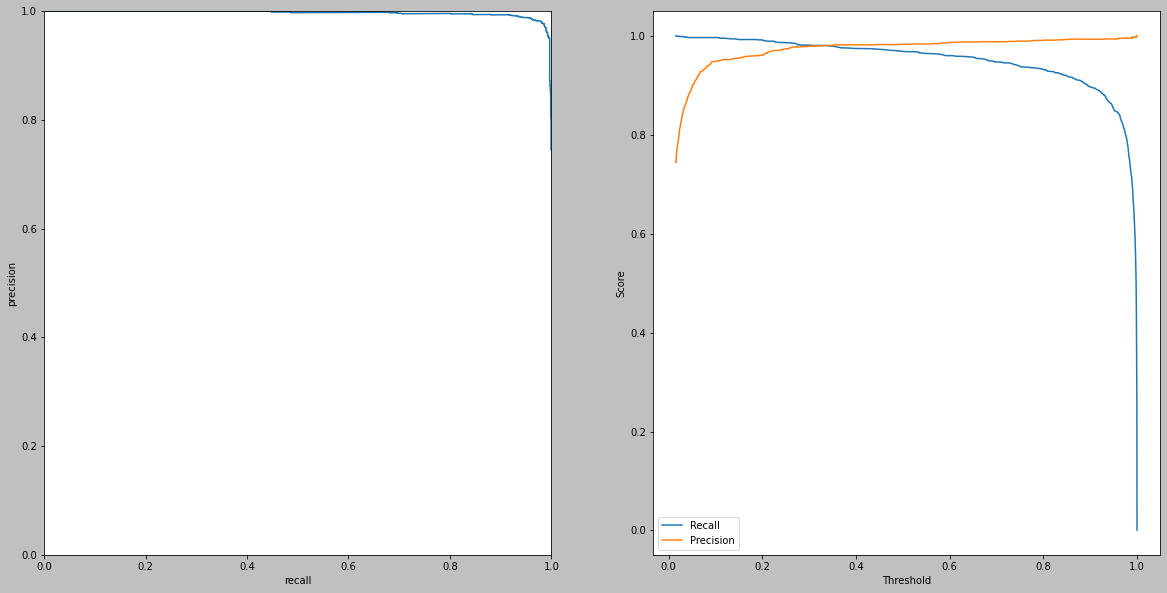

In [ ]:
y_test = data['0.NotRisky']
y_pred = data['0.NotRisky_proba']

y_tests.append(y_test)
y_preds.append(y_pred)
x1=y_tests
y1=y_preds
precision_recall(y_test, y_pred)

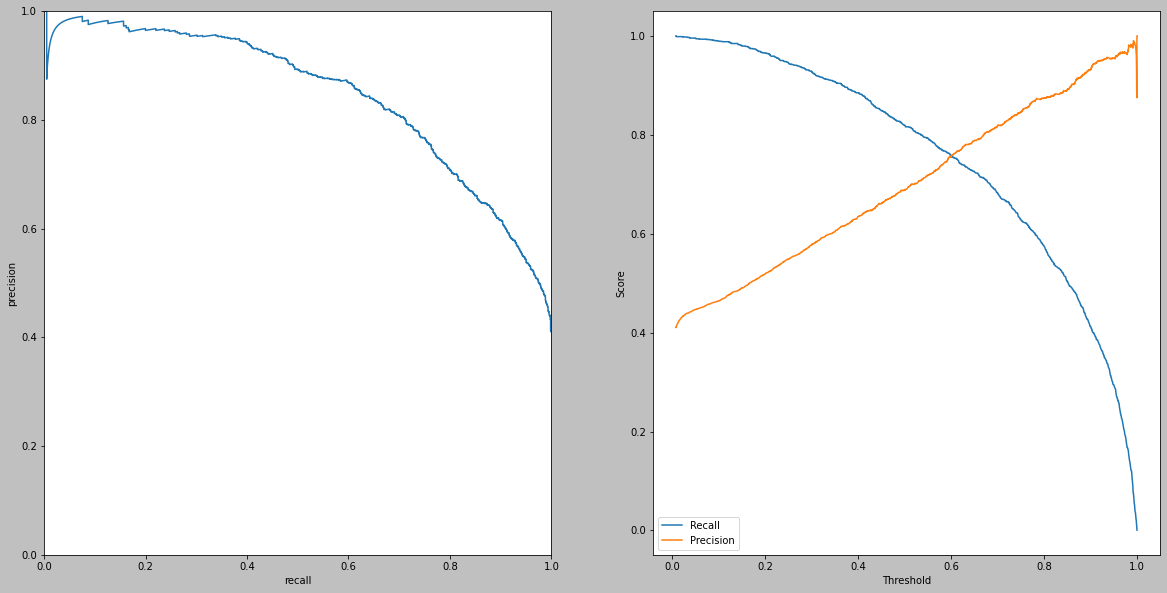

In [ ]:
y_test = data['1.Risky']
y_pred = data['1.Risky_proba']

y_tests.append(y_test)
y_preds.append(y_pred)
precision_recall(y_test, y_pred)


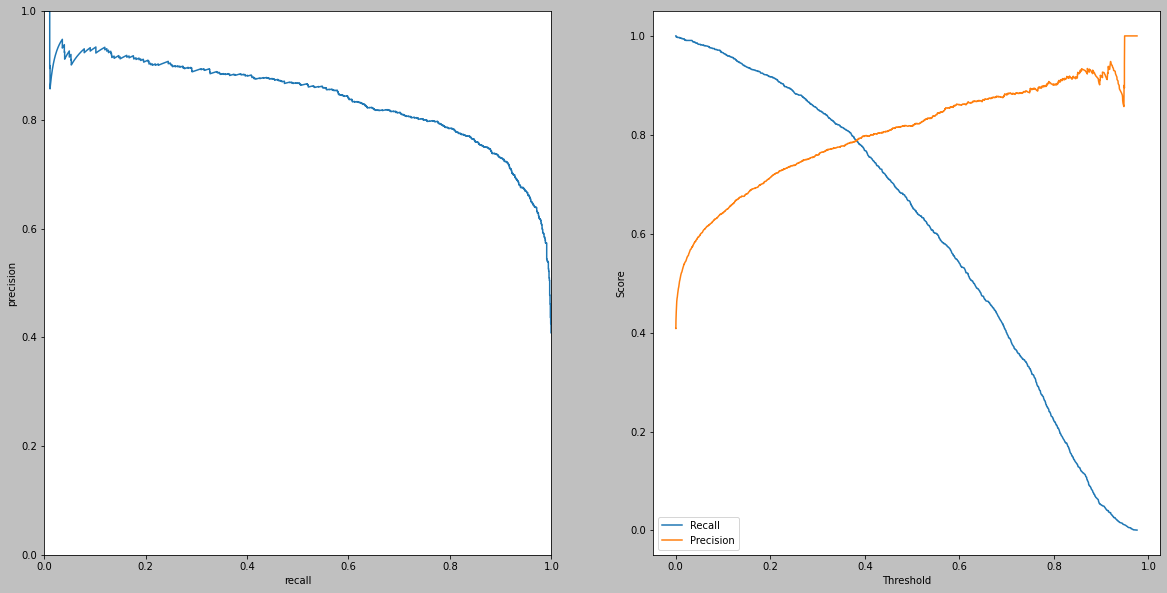

In [ ]:
y_test = data['2.SecondHand']
y_pred = data['2.SecondHand_proba']

y_tests.append(y_test)
y_preds.append(y_pred)

precision_recall(y_test, y_pred)

In [ ]:
n_classes=categories_encoder.columns.size
average_precision = dict()
list_thresholds=dict()
all_recalls=dict()
all_precisions=dict()
for i in range(n_classes):
  average_precision[i] = average_precision_score(y_tests[i],y_preds[i])
  precisions, recalls, thresholds = precision_recall_curve(y_tests[i], y_preds[i])
  all_recalls[i]=recalls
  list_thresholds[i]=thresholds
  all_precisions[i]=precisions
  
flat_list = [item for sublist in list(list_thresholds.values()) for item in sublist]
all_precisions_list=[item for sublist in list(all_precisions.values()) for item in sublist]
all_recalls_list=[item for sublist in list(all_recalls.values()) for item in sublist]
print(flat_list)
print(all_precisions_list)
print(all_recalls_list)

f_score_average=2*(sum(all_precisions_list)*sum(all_recalls_list))/(sum(all_precisions_list)+sum(all_recalls_list))

print(f_score_average)

[0.01546236, 0.015569759, 0.015583473, 0.015587645, 0.015624481, 0.015625568, 0.015628181, 0.015648672, 0.015656685, 0.015721234, 0.015731713, 0.015755372, 0.015784882, 0.015807517, 0.015807802, 0.015947884, 0.016003652, 0.016049564, 0.016084215, 0.016093403, 0.016102873, 0.016146455, 0.016167292, 0.016191043, 0.016200718, 0.016224248, 0.016235296, 0.0162829, 0.01631515, 0.016398452, 0.016422067, 0.016455783, 0.0165011, 0.016535208, 0.016548878, 0.016561938, 0.016574074, 0.016584633, 0.016667236, 0.016673602, 0.016679743, 0.016680626, 0.016713228, 0.016743014, 0.016794266, 0.016828403, 0.01688025, 0.016978724, 0.016983904, 0.016985549, 0.016993467, 0.017015, 0.017068105, 0.017076261, 0.017092291, 0.017377326, 0.017432854, 0.01756969, 0.017579596, 0.017654594, 0.01767043, 0.017692732, 0.017735349, 0.017745636, 0.017752342, 0.017753122, 0.017783392, 0.017890457, 0.017959999, 0.017978365, 0.01799011, 0.017994612, 0.017999455, 0.01805753, 0.018059485, 0.018269971, 0.018322494, 0.018469358,

In [ ]:
y_tests_array=np.array(y_tests)
y_preds_array=np.array(y_preds)
precision, recall, threshold= precision_recall_curve(
    C
)

In [ ]:
average_precision["micro"] = average_precision_score( y_tests_array.ravel(), y_preds_array.ravel(), average="micro")
print(average_precision)

{0: 0.9964326385504458, 1: 0.8461220479081959, 2: 0.8461220479081959, 'micro': 0.8788686460881816}


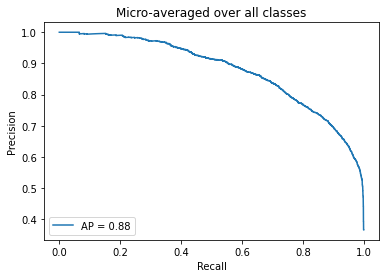

In [ ]:
display = PrecisionRecallDisplay(
    recall=recall,
    precision=precision,
    average_precision=average_precision["micro"],
)
display.plot()
_ = display.ax_.set_title("Micro-averaged over all classes")

[2.3602223e-04 2.3610854e-04 2.3679157e-04 ... 9.9999857e-01 9.9999870e-01
 9.9999905e-01]
[5.36468984e-01 5.36378285e-01 5.36411528e-01 ... 4.61947107e-04
 2.31000231e-04 0.00000000e+00]


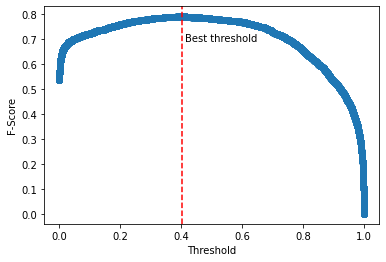

In [ ]:

y_tests = y_tests_array
y_predictions = y_preds_array

precision, recall, thresholds = precision_recall_curve(y_tests.ravel(), y_predictions.ravel())
f_scores = 2 * (precision * recall) / (precision + recall)

print(thresholds)
print(f_scores)
best_threshold = thresholds[np.argmax(f_scores)]
best_f_score = np.max(f_scores)

plt.plot(thresholds[:11816], f_scores[:11816], '-o')
plt.xlabel('Threshold')
plt.ylabel('F-Score')
plt.axvline(x=best_threshold, color='r', linestyle='--')
plt.text(best_threshold+0.01, best_f_score-0.1, 'Best threshold')
plt.show()